# Descriptive Statistics:

Descriptive statistics is the summary of the data, which include the following:  

1. Average: the arithmatic mean, which is the sum of all devided by how many.
2. Median: the middle number after the soft of the numbers.
3. Mode: the most common number in the dataset.
4. Interquartile: the median of the whole, median of the first half (Q1), and the second half (Q2).
5. Measure of the spread or distribution of the data, which includes:
    * range
    * Variance
    * Standard Deviation
    * Skewness
    * Kurtosis
    * Interquartile range
    

# Descriptive Statistics with Numpy
`numpy` provides the basic of descriptive statistics.  
Although `pandas` has statistical functions, but they are from `numpy`.  
In this tutorial we will work mainly on numpy.

---


# Datasets
We are going to work on two datasets.

1. Iris dataset.
2. KNMI dataset (Weather data from Netherlands).

[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a dataset that describes flowers and their attributes, and it is used a lot in the data science and machine learning.
We can get it from one of these two sources:
1. from scikit-learn.
2. download it from [iris website](https://archive.ics.uci.edu/ml/datasets/iris)

[KNMI dataset](https://www.knmi.nl/climatology/daily_data/download.html). a daily measure of weather info from plants across Netherlands.

***


### Load iris from csv:
We are going to work out of CSV file.

In [1]:
import pandas as pd
iris = pd.read_csv('data/iris.data.csv', header=None, 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Get Numpy arrays from Pandas's dataframe:

In [3]:
# if pandas version >= 0.24 you can use .to_numpy()
sepal_widths = iris['sepal_width'].values
petal_widths = iris['petal_width'].values
petal_lengths = iris['petal_length'].values
sepal_lengths = iris['sepal_length'].values

## Basic Descriptive Statistics:

In [4]:
import numpy as np
print ('The max of sepal length: ', sepal_lengths.max(), ' -- ', np.max(sepal_lengths))
print ('The min of sepal length: ', sepal_lengths.min(),  ' -- ', np.min(sepal_lengths))
print ('The mean of sepal length: ', sepal_lengths.mean(), ' -- ',  np.mean(sepal_lengths))
print ('The STD of sepal length: ', sepal_lengths.std(),  ' -- ', np.std(sepal_lengths))
print ('The variance of sepal length', sepal_lengths.var(),  ' -- ', np.var(sepal_lengths))

The max of sepal length:  7.9  --  7.9
The min of sepal length:  4.3  --  4.3
The mean of sepal length:  5.843333333333334  --  5.843333333333334
The STD of sepal length:  0.8253012917851409  --  0.8253012917851409
The variance of sepal length 0.6811222222222223  --  0.6811222222222223


### Median and Percentile:

In [5]:
from scipy.stats import scoreatpercentile
print ('The median of sepal length: ', np.median(sepal_lengths))
print ('Percentile or quartile 50%: ', scoreatpercentile(sepal_lengths, 50))
print ('Percentile or quartile 75%: ', scoreatpercentile(sepal_lengths, 75))

The median of sepal length:  5.8
Percentile or quartile 50%:  5.8
Percentile or quartile 75%:  6.4


## Pandas statistics:

`pandas` builts on top of `numpy` and provides more convenient approach.  

### Dataframe's describe:

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### more statistical functions:
Pandas add more statistical functions:

| Method | Description |
| -------|:------------|
|describe| a general descriptive statistics |
| count | the number of non-NaN values |
| mad | the mean absolute deviation (similar to STD) |
| median | the median (50th percentile) |
| min, max, mode, std, var | .... |
| skew | Skewness is a measure of the asymmetry of the probability distribution |
| kurt | Kurtosis (distribution shape) |


In [7]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [8]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

**AND MORE AND MORE**  

scipy

[scipy statistical module](https://docs.scipy.org/doc/scipy/reference/stats.html)

### Dataframe's plot:

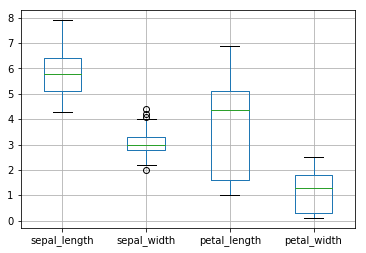

In [9]:
#ipython magic function
%matplotlib inline
iris.boxplot(return_type='axes')

In [10]:
iris.quantile([0.1, 0.9])

,sepal_length,sepal_width,petal_length,petal_width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


# Dealing with empty / invalid data:

many times the data that we got is not ideal, and we could find empty or invalid data.  
We are going to explore Netherlands weather data as example.  

Let us read weather data, and replace empty values with `nan`

In [10]:
to_float = lambda x: float(x.strip() or np.nan)
min_temp = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(12), unpack=True, 
                                converters={12: to_float}, 
                                                 skiprows=1) * .1

print ('min including nan: ', min_temp.min())
print ('max including nan: ', min_temp.max())

min including nan:  nan
max including nan:  nan


### exclude NaN in statistics:

* nanmin
* nanmax
* nanmean
* nanmedian
* ...

In [11]:
print ('excluding nan: ')
print ('min', np.nanmin(min_temp))
print ('max', np.nanmax(min_temp))
print ('mean', np.nanmean(min_temp))
print ('median', np.nanmedian(min_temp))

excluding nan: 
min -19.700000000000003
max 23.6
mean 6.627724838066767
median 6.800000000000001


## More robust approach to exclude invalid data: Masked Arrays:

nanmin is just a simpler and shorter approach to a more robust way to deal with invalid data.  
It is called `Masked Arrays`.  
It is part of sub-module `numpy.ma`.  

In [12]:
import numpy.ma as ma
inp = np.array([1,2,3,-100,5])
negative = lambda x: x < 0
print ('negative of the input array : ', negative(inp))
mask_inp= ma.array(inp, mask = negative(inp))
print ('mean of positive numbers: ', mask_inp.mean())

negative of the input array :  [False False False  True False]
mean of positive numbers:  2.75


### More features of masked arrays:  

1. By using masked arrays then we don't need to use nanmin, ....  
We can use min, max, mean, ...etc

In [13]:
import numpy.ma as ma

masked_min = ma.array(min_temp, mask = np.isnan(min_temp))
print ('min without using nanmin', masked_min.min())

min without using nanmin -19.700000000000003


2. we can get the valid only value:

In [14]:
print ('length all : ', len(masked_min))
print ('length of valid: ', len(masked_min.compressed()))

length all :  93272
length of valid:  64224


another way is to use: `masked_invalid`, which will include `NaN` and `Infinite`

In [15]:
maxs = ma.masked_invalid(min_temp)
maxs.min()

-19.700000000000003

### Pandas features to deal with invalid data:

Panda is `NaN` friendly.  
All its statistical functions are by default ignoring NaN.  

In [16]:
weather = pd.read_csv('data/KNMI.txt', header=0, usecols=(12,14), names=["min", "max"], converters={12: to_float, 14: to_float})
weather.head()

,min,max
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [17]:
weather['min'].min()

-197.0

Pandas has more features to deal with invalid data.  
A robust function `fillna`.

In [18]:
test_weather = weather.fillna(0)
test_weather.head()

,min,max
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Exercise: Check for global warming:


In [19]:
avg_temp, min_temp, max_temp = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(11, 12,14), unpack=True, 
                                converters={11: to_float, 12: to_float, 14: to_float}, 
                                                 encoding='latin1', skiprows=1) * .1

In [20]:
avg_temp = ma.array(avg_temp, mask = np.isnan(avg_temp))
min_temp = ma.array(min_temp, mask = np.isnan(min_temp))
max_temp = ma.array(avg_temp, mask = np.isnan(max_temp))

In [21]:
from datetime import datetime as dt
to_year = lambda x: dt.strptime(x, "%Y%m%d").year

years = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(1), unpack=True,
                  converters={1: to_year}, encoding='latin1', skiprows=1)

print ('first year: ', years.min(), ' and last year: ', years.max())

first year:  1951.0  and last year:  2019.0


and we will draw a graph of mean tempreture by year

In [22]:
year_range = range(int(years.min()), int(years.max()))

print ('range of years: ', year_range)
avg_of_avg_temp_by_year = [avg_temp[np.where (years == year)].mean() for year in year_range]


range of years:  range(1951, 2019)


#### alternative way of the above comprehension list: 

```python
avg_of_avg_temp_by_year=[]
for year in range(int(years[0]), int(years[-1]) -1):
    indices = np.where (years==year)
    avgs.append(avg_temp[indices].mean())
```

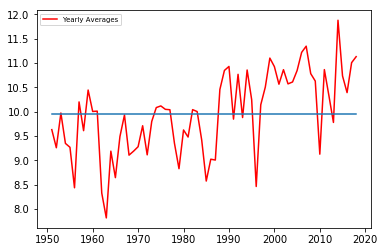

In [23]:
import matplotlib.pyplot as plt
plt.plot(year_range, avg_of_avg_temp_by_year, 'r-', label='Yearly Averages')
plt.plot(year_range, np.ones(len(avg_of_avg_temp_by_year)) * np.mean(avg_of_avg_temp_by_year))
plt.legend(prop={'size': 'x-small'})
plt.show()

# EDA: Beyond Basic Statistics
Descriptive statistics are the basic of more deeper and comprehensive analysis. It is the basic tool for the `EDA` **Exploratory Data Analysis**. EDA is required to understand a dataset better, check its features and get a perliminary idea about the data.  

## Correlation Coefficient

`Numpy` has functionality to study the [`Correlation coefficient`](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between two variables:

In [24]:
sun_radiation = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(20), unpack=True, 
                                converters={20: to_float}, 
                                                 encoding='latin1', skiprows=1)
sun_radiation = ma.masked_invalid(sun_radiation)
match_temp = avg_temp[np.logical_not(np.isnan(sun_radiation))]
corr = np.corrcoef(match_temp, sun_radiation.compressed())[0][1]
print ('Correlation Coefficient: ', corr)

Correlation Coefficient:  0.6171336988259747


## The Covariance Matrix:

The convariance matrix is finding the correlation between all the different pairs of features, and usually it is the first step in data analysis to concentrate on correlated features, and eliminate un-related features.

It is called : `Dimensionality Reduction`

Easy way to get Covariance Matrix:

In [25]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


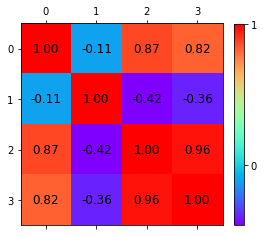

In [26]:
corrdata = iris.corr()
img = plt.matshow(corrdata, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
corrvalues = corrdata.values
for x in range(corrvalues.shape[0]):
    for y in range(corrvalues.shape[1]):
        plt.text(x, y, "{0:.2f}".format(corrvalues[x,y]), size=12, color='black', ha='center', va='center')

### Calculating Correlation between features based on custom factors

In [27]:
pd.crosstab(iris['petal_length'] > 3.758667, iris['petal_width'] > 1.198667)

petal_width,False,True
petal_length,,
False,56,1
True,4,89


### Categorial data:

In [28]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## All in one: pandas-profiling:

`pandas-profiling` package does a very high level statistical profiling on the data, and generate profile report.  
For each column it does the following: quantile, descriptive, most frequent values, histogram, missing values, correlations...  

Examples: 

* [Census](https://pandas-profiling.github.io/pandas-profiling/examples/census/census_report.html).  
* [Nasa](https://pandas-profiling.github.io/pandas-profiling/examples/meteorites/meteorites_report.html)